# Image Manipulation Detection Using Convolutional Neural Networks
> ### Advanced Data Analytics for Management Support
> **Summer Semester 2019**
> 
> Name: Hashem Amireh
> 
> Matriculation Number: 594387





# Introduction
## Motivation
In his book The Meaning of It All, Richard Feynman--a  Nobel laureate in physics and one of the atomic bomb developers in the Manhattan Project--discusses the value of science and the innovations it leads to. He goes on to use an analogy he learned from a man in a Buddhist temple who said, "To every man is given the key to the gates of heaven. The same key opens the gates of hell." [1] He then explains that scientific discoveries and innovations are like keys that can open both the gates of heaven and hell and that it is up to society to decide which gates to open. 

Put simply, Feynman's message was that technologies have and always be used in both negative and positive ways. It is up to us to promote better uses and fight the negative effects.

Technoologies like photo and video editing undoubtedly have their benifits. However, they also come with costs. They can be used to create fake content aiming at creating division, inciting violence, and so on. The U.S. 2016 election interference is an example of how social media content featuring fake photos was used to spread disinformation and create divisive political dicourse. Similarly, deep larning can also be used to create highly convincing fake videos featuring real people commonly called "deep fakes." [2] These technologies can be used to make it look like a politician or a celebrity said or did something that is untrue. Furthermore, they can be used to create what's commonly known as fake "revenge porn" where someone's face can be convincingly super-imposed in a porn scene and posting it online to harm their targets. Some websites like PornHub have banned deepfakes from being uploaded to their websites. [3] However, policing these things is no easy task. Luckily, deep learning not only allows us to create fake content but also detect it. Companies like PornHub will need such machine learning algorithms to detect deepfakes.

## The Task and Data

In order to examine and demostrate possible ways to detect altered visual content, we will use a simple altered-face detection task. The dataset we are provided consists of two subsets: training and testing image sets. The images are all RGB images in JPEG format and have the dimensions 600x600. This fact the the size and format of the images is consistent makes our analysis less complicated.

 The training set contains 1354 images, 364 are labelled as "fake" while the remaining 891 are labeled as "real". The fake images are images of faces where the face has been altered by image editing software while the ones labelled "real" are not. The extent of how obvious the alteration of the fake images varies. The fake images are also labelled with "easy", "medium", or "hard" to describe how obvious the alterations are with "easy" being the most obvious while "hard" being the least.

>![Image 1](https://i.imgur.com/uGYrGjl.png)
>
>_Figure 1: Examples of "fake" Images in Training_
 
Figure 1 demonstratess examples of these different levels of "ease". You can see that the alteration in the image labelled "easy" is very obvious while it becomes more subtle as we move to the right. This classification of "ease" could be useful for the task at hand but since the training data is already small, further unnecessary splitting of the data should be avoided, therefore we will ignore the ease classification. Relatively speaking, the training dataset provided is small for a task such as this but as will be shown later, there are still methods to get relatively good results even with such small data.

Do note that while some variation in terms of how much of the picture the face takes up, in all the images the face takes up a majority of the image and is somewhat centered.

The test set provided contains 481 unlabelled images. That said, we can test the performance of our models by uploading our predicted probability that each image is fake to Kaggle which would calculate the Area Under The Curve (AUC) for the Receiver Operating Characteristics (ROC). Each test image has a unique label to identify it. 



## Possible Methods for Detection - Literature Review
Before delving into how we can digitally detect image alteration, we first must understand how a computer reads an image. Let us begin with a simpler form of images: grayscale images. A black and white image can be intepreted as a series of values each representing the blackness---or alternatively whiteness---of a given pixel. By creating a grid of these values, we create a two-diminsional numerical representation of the image. Colored images consist of multipe color channels that when compbined create other colors. The most common color channel set up is called RGB (red, green, and blue) where each color is represented by an integer from 0 to 255. Another common one is CYMK (cyan, magenta, yellow, key/black), which is commonly used by printers. To represent a colored image using RGB, we must add a third dimension representing the color channel. In the case of RGB, the result would be three different two-dimensional grids, each representing a color channel. Figure 2 below provides a visual demonstration.

>![alt text](https://miro.medium.com/max/1050/0*uiTW_iwX3T1EkRec)
>
>_Figure 2: RGB Image Representation_

This visual numerical representation with-in a three-dimensional array can then be processed by digital algorithms. While our task only looks at still images, it is worth pointing out that since videos are simply a series of image frames stitiched together, a numerical representation of a video would smply just add another dimension (frame order) resulting in a four-dimensional array.

Now that we have a firm understanding of how images can be read as data by computers, we can now look into some of the ways image forgery detection can be done. This is by no means a comprehsnive literature review of detection methods but it is rather a selection of various methods that can give us a better understanding of the many approaches one can have for detecting image manipulation. 

### Non-Data Driven Methods

There are really two main ways to go about resolving this task. The first and perhaps less evoloved type of methods is non-data driven methods. Unlike data driven methods, these methods rely solely on a set of human outlined rules to detect image manipulation. In other words, these methods do not rely on being "trained" on existing datasets in order to maximize their accuracy. Since these methods generally rely on human outlined rules, they are generally simpler to understand and desribe. On the other hand, neural networks act as a blackbox in which it is much harder for a human to actually understand how a neural network is deciding how a certain image is being classified. 

Non-data driven methods can rely on a variety of methods to detect image manipulation and forgery. In fact, they can rely on methods that do not actaully look at the image itself and the pixels within but rely intead on ancillary features such as quirks in the compression of the image. For instance, Farid [5] finds that it can be possible to determine whether an image was processed by checking if a JPEG file features two types of image compression. The idea is that the image is initially compressed by the digital camera used to take the image (or the scanner used to scan it) and then compressed with different settings by the image editing software. This method is called image-quantization. While these methods are illuminating, we are largely interested in methods that deal with the image itself rather than auxilary features like meta-data and so on.

#### Pixel-Based Methods
This group of non-data driven methods is probably the most relevent to our task since they are related to the content of the image itself. These methods rely on detecting pre-defined  features in the image that are indicative of image manipulation.

A common type of image forgery is **copying and pasting** patterns or objects in an image. This is commonly used to replicate an object in an image (like addiing an additional window for a building by simply copying an existing window and pasting it elsewhere. It can also be used to hide certain objects by copying a texture to cover the object. This type of forgery can be detected by an algorithm that searches for identical patterns in an image. The premise is that it is extremely unlikely that an unmodified image will have the exact same pattern of pixels repeated anywhere [6]. A more complicated method is **copying and resampling** in which an object is not only copied but is also resized, rotated, or flipped. In these cases, searching for pixel-for-pixel duplication would be ineffectual. However, it is still possible to check is certain components of an image are copied with basic alteration.

Another common type of image forgery is **splicing** from other images. This is similar to the copy/paste method but where the "spliced" object comes from another image. This form of image manipulation is very relevent to our task since it appears that a lot of the "fake" images in our dataset seem to have spliced components. Models have been developed to detect splicing using certain statistical methods based on fourier series [7].

Many other non-data driven methods that we will not mention in detail exist. For instance, some models look for physics based light inconsistencies while others can use geometric in inconsistencies. Birajdara and Mankar provide a thorough list of various methods [8].



### Data-Driven Methods

While some of the non-data driven methods can be very effective in determining whether an image has been manipulated, they can be very resource-intensive. This can be costly if a company like imgur is trying to screen all the images uploaded to its platform for image manipulation. Another disadvantage is that employing a single non-data driven method may only be sufficient to detect only one type of alteration. This requires the use of multiple methods at the same time further increasing the resources needed.

This is where data driven methods come in. Data-driven methods rely on feeding pre-labelled image data into a computer model that can then "learn" to detect forged images. While other data-driven methods do exist, neural networks are generally the most effective and efficient method. Effective in the sense that they have high levels of accuracy and efficient in the sense that they are not very resource intensive (at least not in the detection phase, the training phase can be a bit more resource intensive). It is important to point out that features from non-data driven methods can be added to neural networks to improve their effectiveness. This allows for mixed models. For instance, Gopi et al. incorporated a copy/paste method into an artificial neural network to detect forged images [9]. 

Neural networks have proven their effectiveness in classification tasks time and time again. That said, traditional "feed-forward" neural networks would require a large amount of processing power if every pixel is to be connected to every hidden layer. More recently, convolutional neural networks (CNNs) became the industry standard for image and spacial models. The most recent major breakthrough that popularized CNN use was Krizhevsky et al's application to the ImageNet database which consists of a large number of labelled images [10]. Today, the ImageNet project has 14 million different image files in more than 20,000 different categories [11]. However, using convolutional neural networks for image data is not new. The potential was realized as early as 1997 when Lawrence et al. proposed using convolutional neural networks for image recognition [12]. Unsurprisingly, CNNs are inspired by the visual cortex of the brain. Put simply, both the visual cortex of the brain and CNNs simplify visual space into smaller sections that overlap making detecting features easier and requires less computing power.

Because of the sheer size of the ImageNet project, convolutional neural networks trained using images from the project can achieve impressive results in classification tasks. This gave birth to the VGG16 pre-trained neural network project based on Simonyan and Zisserman's 2014 paper [13]. VGG16 is a publicly available pre-trained neural network that was trained on the ImageNet database. Using the VGG16 pretrained network has been proven to be very effective in classification tasks where the goal is to identify the object in the image. However, VGG16 can be also used for other types of classification tasks. A custom convolutional neural network can be used with the pre-trained "bottleneck features" from VGG16. However, it is unclear whether using VGG16 bottleneck features can help imporve forgery detection. This is what we will investigate in this assignment.













#Implementation

##Mounting Google Drive and Loading Necessary Packages

In [0]:
# Mounting Google Drive for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import packages
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt # For plotting

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Dropout
from keras import optimizers # For customized optimizers
from sklearn import metrics
from keras.layers import MaxPooling2D, Conv2D # Needed for convolutional neural networks.
from keras.preprocessing.image import ImageDataGenerator # Needed for image augmentation
from keras import applications #Needed for VGG implementation

## Load Images and Split Into Train/Validation Folders

The training data provided consists of a labelled training set and an unlabelled test set. We have the ability to test the performance of our models on the test set by uploading our predictions to Kaggle. Therefore, it is sufficient to split the training set simply into a training set and a validation set without worrying about getting another test set. This is useful since the training set is not very large and we would like to use as much for it as possible.

Training images folder consists of two folders: "real" and "fake." In order to split the data into a training and validation sets, we use a package called 'split-folders' which must be installed first. We are splitting the training set into 20% validation and 80% training. This leaves us with 272 pictures in the validation set and 1082 in the training set. While 272 is a small number, we do use image augmentation for both sets to increase the amount of data. Furthermore, the fact that we have a larger test set (481) images will provide a final and more accurate performance measure.

In [0]:
# First we install the package
pip install split-folders
# Now we install a progress bar for the package since the process takes several minutes
pip install split-folders tqdm

In [0]:
import split_folders

In [0]:
split_folders.ratio('drive/My Drive/ColabNotebooks/training_2', output='drive/My Drive/ColabNotebooks/output_2', seed=1337, ratio=(.8, .2))

After splitting the training images, it is now split into two folders: 'val' and 'training'. Each folders contains two subfolders 'fake' and 'real' that serve as labels.

Note that we verified that the package does shuffle the data before splitting it. However, this code was removed to keep the notebook short. This is important since the order of the fake images in the training set is not random; they are ordered in categories by how obvious the editing is as mentioned in the Introduction.

##Benchmarking Model

Since we are interested in how effective CNNs using VGG16 bottleneck features are when it comes to detecting image manipulation, it makes sense to benchmark our method against a non-pretrained CNN.

We also attempted to use a feed-forward neural network as a secondary benchmark. However, that model led to maximizing RAM usage and crashing the session. Reducing the image size to 200x200 pixels as opposed to the original size did little to alleviate the issue leading to the decision to drop the feed-forward nerual network as a benchmark model. This intense resource use is consistent with our theoretical expectation when using feed-forward neural networks for spatial data. 

### Read Images and Set Augmentation

In [38]:
dim=600 # The dimension of the images
batch_size=32

train_generator = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30, # In most of the images, the faces are upright. However, a little tilt is possible so we are allowing 20 degrees in each direction.
                                   width_shift_range=0.1, # Since the faces are generally quite centered, some minor vertical and horizental shift is useful. However, we are keeping it to 0.1 to avoid cutting the faces in the process.
                                   height_shift_range=0.1,
                                   #shear_range = 0, # We are not allowing for any image shear since it would distort faces which is not useful for this task.
                                   zoom_range = 0.1, # Zooming in might also be useful since some face take up smaller amounts in the screen. Again, we are being conservative since the data is largely consistent.
                                   horizontal_flip = True) # Since faces are structurally symmetrical, we can horizenatally flip t

val_generator = ImageDataGenerator(rescale = 1./255) # We do not want to make any augmentation to the validation set other than rescaling the colors (so it is comparable)

train_set = train_generator.flow_from_directory('drive/My Drive/ColabNotebooks/output_2/train',
                                                 target_size = (dim, dim), # Since we do not intend to resize the images
                                                 batch_size = batch_size,
                                                 class_mode= 'binary')



val_set = val_generator.flow_from_directory('drive/My Drive/ColabNotebooks/output_2/val',
                                            target_size = (dim, dim),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 1082 images belonging to 2 classes.
Found 272 images belonging to 2 classes.


In [0]:
n_train = len(train_set)
print(n_train)
n_val = len(val_set)
print(n_val)

34
9


### Set up and Run Model

In [43]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(dim, dim, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 598, 598, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 598, 598, 32)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 299, 299, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 297, 297, 32)      9248      
_________________________________________________________________
activation_17 (Activation)   (None, 297, 297, 32)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 146, 146, 64)    

In [44]:
history_bench = model.fit_generator(
        train_set,
        steps_per_epoch= n_train,
        epochs=15,
        validation_data=val_set,
        validation_steps= n_val)

Epoch 1/15
34/34 [==============================] - 73s 2s/step - loss: 1.4359 - acc: 0.6257 - val_loss: 0.6888 - val_acc: 0.6176
Epoch 2/15
34/34 [==============================] - 72s 2s/step - loss: 0.7443 - acc: 0.6465 - val_loss: 0.6638 - val_acc: 0.6581
Epoch 3/15
34/34 [==============================] - 71s 2s/step - loss: 0.7146 - acc: 0.6507 - val_loss: 1.1798 - val_acc: 0.6581
Epoch 4/15
34/34 [==============================] - 72s 2s/step - loss: 0.6896 - acc: 0.6573 - val_loss: 0.6705 - val_acc: 0.6581
Epoch 5/15
34/34 [==============================] - 71s 2s/step - loss: 0.7042 - acc: 0.6414 - val_loss: 0.6625 - val_acc: 0.6581
Epoch 6/15
34/34 [==============================] - 71s 2s/step - loss: 0.6636 - acc: 0.6567 - val_loss: 0.6615 - val_acc: 0.6618
Epoch 7/15
34/34 [==============================] - 71s 2s/step - loss: 0.6689 - acc: 0.6597 - val_loss: 0.6504 - val_acc: 0.6581
Epoch 8/15
34/34 [==============================] - 72s 2s/step - loss: 0.6958 - acc: 0.64

### Plotting Model Accuracy and Loss

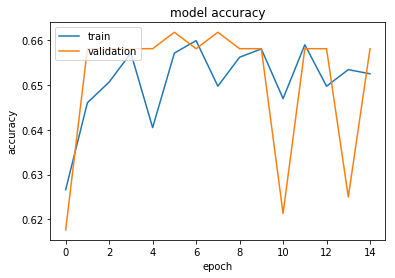

In [45]:
plt.plot(history_bench.history['acc'])
plt.plot(history_bench.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

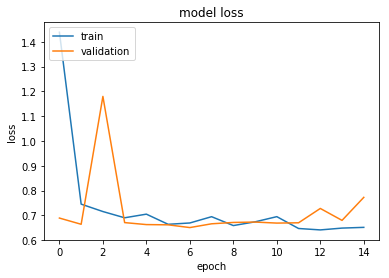

In [46]:
plt.plot(history_bench.history['loss'])
plt.plot(history_bench.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Predicting Model on Test Data
We need to use the fuction "predict_generator" and run the test data through the resampling generator so it matches the format of our training data.

In [0]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_set = test_generator.flow_from_directory('drive/My Drive/ColabNotebooks/test',
                                            target_size = (dim,dim),
                                            batch_size = 1,  # Since this is the test set
                                            class_mode = None,
                                            shuffle = False)  # We do not want to shuffle since we want to maintain the same order so the image identifiers don't get mixed
                                            
test_data = model_bench.predict_generator(test_set, len(test_set))

filenames = test_set.filenames
n_pics = len(filenames)



In [0]:
pred = model.predict(test_data)
pred2 = [1-x for ([x]) in pred] # The model is predicting the probability that the image is real so we need ot reverse it

In [0]:
filenames2 = [x.replace('.jpg', '').replace('unknown/', '') for x in filenames] # Takes out the path and the file type to leave only the label

In [0]:
df = pd.DataFrame() # Set up an empty dataframe
df['ID']  = filenames2 # This column will contain the IDs
df['fake'] = pred2 # This column will contain the prediction probability that the image is fake
df.to_csv("submission1.csv", index=False) # Save the file

### Results
The benchmark model achieved an AUC-ROC of 0.51612 on the test set when uploaded to Kaggle.

## VGG16 Bottleneck Features Implementation

Since we are only using the bottleneck features from VGG16, would should still be able to use the full size of the images we have. However, the images are too big and it is a good idea to resize them anyway to reduce the computer power needed. To keep things simple, we will resize the images during the resampling process to 224x224, which is the size of the images used in training the VGG16 neural network.

### Read Images and Set Augmentation

In the model below, we do not perform any serious data augmentation such as rotating and shearing the image. We did attempt to run the VGG16 bottleneck model below with augmentation similar to that used in the benchmark model above but it surprigingly led the accuracy and loss to vary a lot for the validation set so we chose to exclude any elaborate augmentation as we did in the augmentation model above.

In [0]:
dim = 224 # This is the image size used in the VGG16 neural network

batch_size = 32

datagen = ImageDataGenerator(rescale=1. / 255)

# Retrieve the VGG16 pretrained features
model_vgg = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
        'drive/My Drive/ColabNotebooks/output_2/train',
        target_size=(dim, dim),
        batch_size=batch_size,
        class_mode='binary', # Output is binary
        shuffle=False) # The data has already been shuffled during the splitting into training and validation so shuffling is not necessary 

training_labels = generator.labels
nb_train_samples = len(training_labels)


train_data = model_vgg.predict_generator(generator, len(generator))

generator = datagen.flow_from_directory(
        'drive/My Drive/ColabNotebooks/output_2/val',
        target_size=(dim, dim),
        batch_size=batch_size,
        class_mode='binary', # Output is binary
        shuffle=False) # The data has already been shuffled during the splitting into training and validation so shuffling is not necessary 

validation_labels = generator.labels
nb_validation_samples = len(validation_labels)

validation_data = model_vgg.predict_generator(generator, len(generator))





58892288/58889256 [==============================] - 2s 0us/step


Found 1082 images belonging to 2 classes.
Found 272 images belonging to 2 classes.


### Setting up and Running Model
In previous runs, the model was run with 0.2 dropout and 25 epochs. However, it would start overfitting immediately. Therefore, we increased the dropout to 0.5 which led to severe overfitting to begin after epoch 7 so we reduced the number of epochs to 7 and reran it.

In [0]:
model = Sequential() 
model.add(Flatten(input_shape=train_data.shape[1:])) 
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.4))) 
model.add(Dropout(0.5)) 
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.4))) 
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid')) # Because of binary output
model.compile(loss='binary_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])

history_vgg16 = model.fit(train_data, training_labels, 
   epochs=7,
   batch_size=batch_size, 
   validation_data=(validation_data, validation_labels))

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Train on 1082 samples, validate on 272 samples
Epoch 1/7
1082/1082 [==============================] - 1s 526us/step - loss: 0.7860 - acc: 0.6017 - val_loss: 0.6218 - val_acc: 0.6176
Epoch 2/7
1082/1082 [==============================] - 0s 206us/step - loss: 0.6446 - acc: 0.6673 - val_loss: 0.5949 - val_acc: 0.6875
Epoch 3/7
1082/1082 [==============================] - 0s 195us/step - loss: 0.6188 - acc: 0.6830 - val_loss: 0.5841 - val_acc: 0.6985
Epoch 4/7
1082/1082 [==============================] - 0s 199us/step - loss: 0.5979 - acc: 0.6969 - val_loss: 0.5836 - val_acc: 0.6654
Epoch 5/7
1082/1082 [==============================] - 0s 193us/step - loss: 0.5471 - acc: 0.7338 - val_loss: 0.6035 - val_acc: 0.6985
Epoch 6/7
1082/1082 [==============================] - 0s 197us/step - loss: 0.5302 - acc: 0.7375 - val_loss: 0.5778 - val_acc: 0.6985
Epoch 7/7
1082/1082 [==============================] - 0s 197us/step - loss: 0.4895 - acc: 0.7569 - val_loss: 0.6112 - val_acc: 0.6875


### Plotting Model Accuracy and Loss
The accuracy and loss graphs below are shown for 20 epochs (i.e. before re-running the model with 7 epochs instead). It can be seen that the model starts deviating after epoch #7.

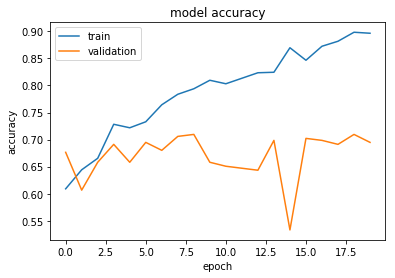

In [0]:
plt.plot(history_vgg16.history['acc'])
plt.plot(history_vgg16.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

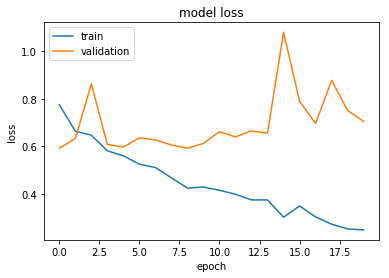

In [0]:
plt.plot(history_vgg16.history['loss'])
plt.plot(history_vgg16.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Predicting Model on Test Data
We need to use the fuction "predict_generator" and run the test data through the resampling generator so it matches the format of our training data.

In [0]:
generator = datagen.flow_from_directory(
        'drive/My Drive/ColabNotebooks/test',
        target_size=(dim, dim),
        batch_size=1, # Since this is the test set
        class_mode=None,
        shuffle=False) # We do not want to shuffle since we want to maintain the same order so the image identifiers don't get mixed


test_data = model_vgg.predict_generator(generator, len(generator))

filenames = generator.filenames
n_pics = len(filenames)



Found 481 images belonging to 1 classes.


In [0]:
pred = model.predict(test_data)
pred2 = [1-x for ([x]) in pred] # The model is predicting the probability that the image is real so we need ot reverse it


In [0]:
filenames2 = [x.replace('.jpg', '').replace('unknown/', '') for x in filenames] # Takes out the path and the file type to leave only the label

In [0]:
df = pd.DataFrame() # Set up an empty dataframe
df['ID']  = filenames2 # This column will contain the IDs
df['fake'] = pred2 # This column will contain the prediction probability that the image is fake
df.to_csv("submission1.csv", index=False) # Save the file

### Results
After uploading these predictions to kaggle, we get an AUC-ROC of 0.70879 for the test set.

# Results and Discussion

After optimizing the VGG16 bottleneck model and the non-pretrained model we reach some pretty interesting results. The pretrained model achieved an AUC of 0.709 vs. 0.516 for the benchmark non-pretrained CNN model. This is an interesting finding since it indicates that while VGG16 primarily trained as an object identifying neural network, the bottleneck features training proved very useful for the maniuplated face images task as it increased the AUC by about 0.19 which is quite substantial. There of course will be room for imporvement. A bigger dataset can make a huge difference for a task like this. Tech companies can persumably afford to compile very large datasets to make these algorithms more effective.


# Conclusion

There is no doubt that the methods to stealthly manipulate images will continue to improve but so will methods to detect them. Farid [14] posits that "[the] field of image forensics, however, has made and will continue to make it harder and more time-consuming (but never impossible) to create a forgery that cannot be detected." However, it is not unforseeable that we might get to a point where detection methods are not able to match the forgery methods. Such a reality could have drastic effects on society as a whole. The use of fake media can lead to further polarization of opinion and tribalism. It could also lead to a crisis of trust where we are unable to trust any media we process leading to paranoia. While this might all come off as largely alarmist, it is important that we higlight these risks today. That is why democratic governments, tech companies, media outlets, and civil rights groups should consider investing in forgery detection research in order to maintain its edge.

#References
[1] R. Feynman, "The Meaning of it All," Addison-Wesley (1998)

[2] K. Roose, "Here Come the Fake Videos, Too," New York Times, Mar 4, 2018

[3] A. Kharpal, "Reddit, Pornhub ban videos that use A.I. to superimpose a person’s face over an X-rated actor," CNBC, Feb 8, 2018

[4] B. Carremans, "Classify butterfly images with deep learning in Keras," Towards Data Science, Aug 17, 2018 https://miro.medium.com/max/1050/0*uiTW_iwX3T1EkRec

[5] H. Farid, “Digital image ballistics from JPEG quantization,” Dept. Comput. Sci., Dartmouth College, Tech. Rep. TR2006-583, 2006.

[6] J. Fridrich, D. Soukal and J. Lukas, "Detection of copy-move forgery in digital images," Proc. of digital forensic research workshop (2003), pp. 55-61

[7] T. Ng and S. Chang, “A model for image splicing,” in Proc. IEEE Int. Conf. Image Processing, Singapore, 2004, vol. 2, pp. 1169–1172.

[8] G. K. Birajdara, V. H. Mankar, "Digital image forgery detection using passive techniques: A survey," Digital Investigation, vol 10 (2013) pp. 226-245

[9] E. Gopi, N. Lakshmanan, T. Gokul, S. Ganesh and P. Shah, "Digital image forgery detection using artificial neural network and auto regressive coefficients," Proc. Canadian conference on electrical and computer engineering (2006), pp. 194-197

[10] A. Krizhevsky, I. Sutskever, G. E. Hinton, "ImageNet Classification with Deep Convolutional Neural Networks," NIPS Proceedings (2012)

[11] ImageNet Project Statistics (2019) http://image-net.org/about-stats

[12] S. Lawrence, C. L. Giles, A. C. Tsoi, A. D. Back, "Face Recognition: A Convolutional Neural-Network Approach," IEEE Transactions on Neural Networks, Vol. 8, No. 1, (1997)

[13] K. Simonyan, A. Zisserman, "Very Deep Convolutional Networks for Large-Scale Image Recognition," (2014)

[14] H. Farid, "Image Forgery Detection: A survey," IEEE Signal Processing (2009)